## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [2]:
df=pd.read_csv("./data/data_000637.txt", nrows=1310721)  ## the file has 1310721 rows
print(df)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


2\. Find out the number of BX in a ORBIT (the value 'x').

42         3187
127        3538
254        2766
352        3377
461        3538
           ... 
1310052    2807
1310260    3546
1310369    3552
1310560    3498
1310697    3525
Name: BX_COUNTER, Length: 11428, dtype: int64
3563


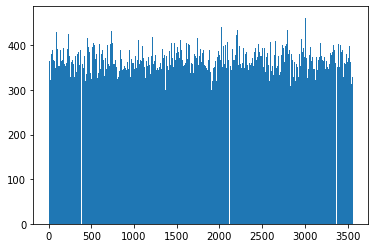

In [3]:
"""ind=df["BX_COUNTER"].tolist().index(0)
print(df["BX_COUNTER"][ind-1])
ind2=df["BX_COUNTER"].tolist().index(0, ind+1)
print(df["BX_COUNTER"][ind2-1])
"""
indexes=(df["ORBIT_CNT"][df["ORBIT_CNT"].diff()==1]).index
#print(indexes)
print(df["BX_COUNTER"][indexes-1])
b=plt.hist(df["BX_COUNTER"], bins=3600)
#print(b[0].tolist().index(0, 100))
print(df["BX_COUNTER"].max())

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [4]:
last_time=df["ORBIT_CNT"][1310719]*3564*25+df["BX_COUNTER"][1310719]*25+df["TDC_MEAS"][1310719]*(25/30)
first_time=df["ORBIT_CNT"][0]*3564*25+df["BX_COUNTER"][0]*25+df["TDC_MEAS"][0]*(25/30)
diff=last_time-first_time
print(last_time, first_time, diff)
sec=int(diff//1000000000)
diff-=1000000000*sec
mn=sec//60
sec-=60*mn
hr=mn//60
mn-=60*hr
dy=hr//24
hr-=24*dy

print(dy, hr, mn, sec, diff)


344746715355165.0 344745734939071.7 980416093.3125
0 0 0 0 980416093.3125


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [5]:
df["time_ns"]=df["ORBIT_CNT"]*3564*25+df["BX_COUNTER"]*25+df["TDC_MEAS"]*(25/30)

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [6]:
df["HEAD"]=np.random.randint(0,2,size=df["HEAD"].shape)
#print(df)

6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [7]:
df2=df[df["HEAD"]==1]

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

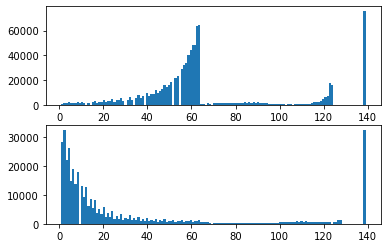

In [8]:
fig, ax=plt.subplots(2)
b0=ax[0].hist(df[df["FPGA"]==0]["TDC_CHANNEL"], bins=140)
b1=ax[1].hist(df[df["FPGA"]==1]["TDC_CHANNEL"], bins=140)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [9]:
df["TDC_CHANNEL"].value_counts() [:3]


/tmp/ipykernel_3159/1152380567.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df["TDC_CHANNEL"].value_counts() [:3]


139    108059
64      66020
63      64642
Name: TDC_CHANNEL, dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [13]:
labels=np.unique(df["ORBIT_CNT"])
print(len(labels))
labels=np.unique(df[df["TDC_CHANNEL"]==139]["ORBIT_CNT"])
print(len(labels))

11001
10976
